## Matrix Games
$\newcommand{\n}[1]{\left\|#1 \right\|}$ 
$\renewcommand{\a}{\alpha}             $ 
$\renewcommand{\b}{\beta}              $ 
$\renewcommand{\c}{\gamma}             $ 
$\renewcommand{\d}{\delta}             $ 
$\newcommand{\D}{\Delta}               $ 
$\newcommand{\la}{\lambda}             $ 
$\renewcommand{\t}{\tau}               $ 
$\newcommand{\s}{\sigma}               $ 
$\newcommand{\e}{\varepsilon}          $ 
$\renewcommand{\th}{\theta}            $ 
$\newcommand{\x}{\bar x}               $ 
$\newcommand{\R}{\mathbb R}            $ 
$\newcommand{\N}{\mathbb N}            $ 
$\newcommand{\Z}{\mathbb Z}            $ 
$\newcommand{\E}{\mathcal E}           $ 
$\newcommand{\lr}[1]{\left\langle #1\right\rangle}$
$\newcommand{\nf}[1]{\nabla f(#1)}     $
$\newcommand{\hx}{\hat x}               $
$\newcommand{\hy}{\hat y}               $
$\DeclareMathOperator{\prox}{prox}      $
$\DeclareMathOperator{\argmin}{argmin}  $
$\DeclareMathOperator{\dom}{dom}        $
$\DeclareMathOperator{\id}{Id}          $
$\DeclareMathOperator{\conv}{conv}      $

We are interested in the following min-max matrix game
\begin{equation}
    \min_{x \in \D_n}\max_{y\in \D_m} \lr{Ax, y},
\end{equation}
where $x\in \R^n$, $y\in \R^m$, $A\in \R^{m\times n}$, and $\Delta_m$,
$\D_n$ denote the standard unit simplices in $\R^m$ and $\R^n$
respectively.


In [1]:
import matplotlib.pyplot as plt
import scipy.sparse as spr
import scipy.sparse.linalg as la

from opt_operators import *
from methods.pd_algorithms import *
from methods.sp_pd_algorithms import *
%reload_ext autoreload
%autoreload 2

Choose any generator for random generation of data. In the paper we set gen = 50

In [2]:
gen = 1

Define matrix $A\in \R^{m\times n}$ (choose one of four possible examples below or generate a new instance):

In [3]:
case = 1
m = 200
n = 100
np.random.seed(gen)
A = np.random.normal(0, 10, [m, n])

In [4]:
case = 2
m = 50
n = 50
s = int(0.1*m)
np.random.seed(gen)
B = np.random.normal(0,1, (m,n))
p = 0.9
A = np.zeros((m,n))
A[0,:] = p*B[0,:]/(np.exp(1-p))
for i in np.arange(1,m):
    A[i,:] = p*A[i-1,:] + B[i,:]

Define the starting points $x^0$ and $y^0$

In [5]:
x0 = np.ones(n)/n
y0 = np.ones(m)/m

Define all proximal operators, primal-dual gap, etc.

In [6]:
# define general proximal operator. Note that it is independent of 
# the dimension, so we will use it for both primal and dual variables
def prox_g(x, rho):
    return proj_simplex(x)

# define primal-dual gap
def J_gap(x,y, min_val):
    return max(A.dot(x)) - min(A.T.dot(y))

def J_gap1(y,x,min_val):
    return J_gap(x,y,min_val)

Compute the matrix norm of operator $A$. 

In [7]:
L = np.sqrt(np.max(la.eigsh(A.dot(A.T))[0])) # this is for sparse matrix
print(L)


64.54420420803427


Run the algorithms: CP-PDA and SP-PDA

In [ ]:
# Run SP-PDA
N = 600000
T = 1e-8
min_val = 0

if case == 1:
    kk = 2.5
else:
    kk = 4.5
    
beta = 1
tau = kk / L
sigma = beta * tau

if m <= n:
    ans1 = pd_sp_msmall(J_gap, prox_g, prox_g, A, x0, y0, sigma, tau, min_val, numb_iter=N, tol=T)
else:
    ans1 = pd_sp_msmall(J_gap1, prox_g, prox_g, -A.T, y0, x0,  tau, sigma, min_val, numb_iter=N, tol=T)
       

----- SP PDA-----
Time execution: 2.3
iteration:
31739
error:
9.895880559440684e-09


In [10]:
# Run CP-PDA
tau = 1. / L      
sigma = beta * tau  
ans2 = pd_new(J_gap, prox_g, prox_g, A, x0, y0, sigma, tau, min_val, numb_iter=N,tol=T)


Golden-Ratio PDA does not terminate after 19.26 seconds
4.791858421171469e-08


Plots of the primal-dual gap vs. CPU time(seconds):

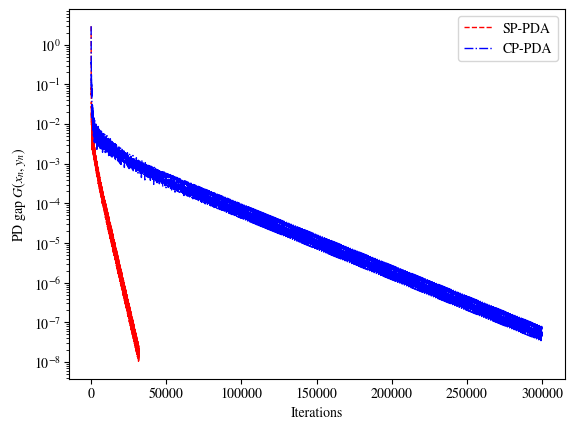

In [ ]:
import matplotlib as mpl
mpl.rc('lines', linewidth=1)
mpl.rcParams.update(
    {'font.size': 10, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2

plt.plot(ans1[0], 'r--', label = 'SP-PDA')
plt.plot(ans2[0], 'b-.', label = 'CP-PDA')

plt.yscale('log')
plt.xlabel(u'Iterations')
plt.ylabel(u'PD gap $G(x_n,y_n)$')
plt.legend()
# plt.savefig('figures/MM-'+str(int(m/100))+'-'+str(int(n/100))+'-'+str(case)+'-iter.pdf')
plt.show()


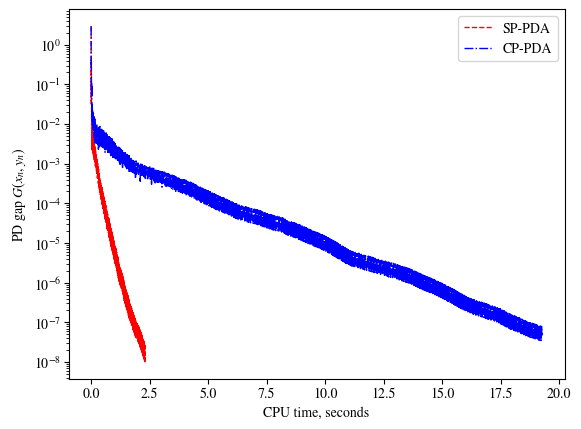

In [ ]:

import matplotlib as mpl
mpl.rc('lines', linewidth=1)
mpl.rcParams.update(
    {'font.size': 10, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2

plt.plot(ans1[-1], ans1[0], 'r--', label = 'SP-PDA')
plt.plot(ans2[-1], ans2[0], 'b-.', label = 'CP-PDA')

plt.yscale('log')
plt.xlabel(u'CPU time, seconds')
plt.ylabel(u'PD gap $G(x_n,y_n)$')
plt.legend()
# plt.savefig('figures/MM-'+str(int(m/100))+'-'+str(int(n/100))+'-'+str(case)+'-time.pdf')
plt.show()
   